Multiplier: 0.5, average: 0.502223510742234, population std. dev.: 0.25726629583445276
Multiplier: 0.667, average: 0.6736956027613381, population std. dev.: 0.48423090733194746


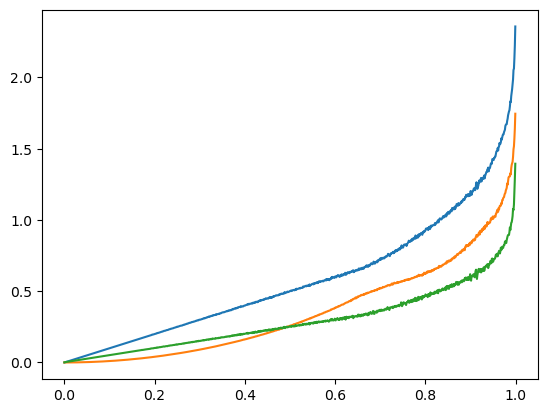

In [1]:
import random
import statistics
from matplotlib import pyplot as plt

def randsign():
    return 1 - 2 * random.randint(0,1)

def grasshopper(multiplier:float=0.5, epsilon:float=1E-12):
    pos=0
    mult=1
    while True:
        pos += randsign() * multiplier
        if multiplier < epsilon:
            return pos
        multiplier *= multiplier
        
def iterated_grasshopper(iterations:int=1000,multiplier:float=0.5,epsilon:float=1E-15):
    r = []
    for _ in range(iterations):
        r.append(grasshopper(multiplier=multiplier,epsilon=epsilon))
    return r

r=[]
st=[]
domain =  [ float(x)/1000.0 for x in range(1000) ]
for m in domain: 
    abs_gh = [ abs(x) for x in iterated_grasshopper(iterations=10000, multiplier=m) ]
    avg = statistics.mean(abs_gh)
    stddev = statistics.pstdev(abs_gh)
    r.append(avg)
    st.append(stddev)
    if m == 0.5 or m == 0.667:
        print(f"Multiplier: {m}, average: {avg}, population std. dev.: {stddev}")
        
dyl = []
dyl.append(0)
for idx, y in enumerate(r):
    if idx >0 and idx < 999:
        dy = r[idx+1] - r[idx-1] / 2
        dyl.append(dy)
dyl[0] = dyl[1] / 2.0
dyl.append(dyl[998] + ((dyl[998]-dyl[997]) * (dyl[998]/dyl[997])))
plt.plot(domain,r)
plt.plot(domain,st)
plt.plot(domain,dyl)
plt.show()
    